# Table of Contents
- [Import Libraries and Data](#import)
- [Recreated Best Performing Model to Inspect Missclassified Posts](#missclass)
- [Recreating Non Stemmed/Lemmed Logistic Regression Count Vectorized Model for Visualizaiton](#visual)
- [Big Text to Represent Time to Run Functions](#text)
- [KNN N-gram DataFrames](#knn)

### Importing Libraries and Data <a id="import"></a>

In [1]:
# Import Libraries

import pandas as pd

# Library tools to turn text in to interpretable DataFrames
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
# Object that uses count vectorizer and Logistic Regrssion as one
from sklearn.pipeline import Pipeline
# Split data to check train model, Input parameters to create best model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import stop_words
from sklearn import metrics

# Importing lemmatizer.
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
          
# Importing stemmer.
from nltk.stem.porter import PorterStemmer

# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

# Naive Bayes Models 
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# Importing plotting functions
import matplotlib.pyplot as plt

import numpy as np


In [2]:
df = pd.read_csv('./lem_stem.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,text,class,lem_text,stem_text
0,The Unofficial Rewatch Thread - S3E06: “What K...,0,the unofficial rewatch thread s3e06 what kind...,the unoffici rewatch thread s3e06 what kind o...
1,Just started watching it and have a few questi...,0,just started watching it and have a few quest...,just start watch it and have a few question i...
2,The Unofficial Rewatch Thread - S3E05: “Oh She...,0,the unofficial rewatch thread s3e05 oh shenan...,the unoffici rewatch thread s3e05 oh shenando...
3,"On the bus, early season 2 Added the spoiler t...",0,on the bus early season 2 added the spoiler t...,on the bu earli season 2 ad the spoiler tag j...
4,The Unofficial Rewatch Thread: S3E04 - “Contem...,0,the unofficial rewatch thread s3e04 contempt ...,the unoffici rewatch thread s3e04 contempt fr...


### Recreated Best Performing Model to Inspect Missclassified Posts <a id="missclass"></a> 

In [4]:
# Rebuilding model that was most accurate on training data - 
X = df['stem_text']
y = df['class']

vect = CountVectorizer(max_df=0.23, max_features=4100, min_df=2, ngram_range=(1,2), stop_words='english')
vect.fit(X)

X_transform = vect.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, stratify=y, test_size=0.1, random_state=30)

nb = MultinomialNB()
nb.fit(X_train, y_train)

print(f'Train score: {metrics.accuracy_score(y_train, nb.predict(X_train))}')
print(f'Test score: {metrics.accuracy_score(y_test, nb.predict(X_test))}')

Train score: 0.9375696767001115
Test score: 0.885


In [5]:
# False positives and false negatives in highest accuracy models
y_pred = nb.predict(X_transform)


df['pred_nb'] = y_pred
fpfn = df[df.pred_nb != df['class']]
fpfn

,text,class,lem_text,stem_text,pred_nb
5,What to watch after my 4th rewatch? It is one ...,0,what to watch after my 4th rewatch it is one ...,what to watch after my 4th rewatch it is one ...,1
20,One thing that has always bugged me about 1-Ma...,0,one thing that ha always bugged me about 1 ma...,one thing that ha alway bug me about 1 may au...,1
46,Favorite Zero Context Quote Don’t give any con...,0,favorite zero context quote don t give any co...,favorit zero context quot don t give ani cont...,1
50,How do you rank the seasons? Title. For me per...,0,how do you rank the season title for me perso...,how do you rank the season titl for me person...,1
84,"""Do we really have to slow down for these peop...",0,do we really have to slow down for these peop...,do we realli have to slow down for these peop...,1
100,"Speaking at an event in New York today, Will M...",0,speaking at an event in new york today will m...,speak at an event in new york today will mc u...,1
109,Well I guess it's just us now. I was hoping to...,0,well i guess it s just u now i wa hoping to h...,well i guess it s just us now i wa hope to he...,1
110,Toby Flendersons character was spot on with hi...,0,toby flendersons character wa spot on with hi...,tobi flenderson charact wa spot on with hi an...,1
117,Season 3 : Run - spotting a familiar face I ju...,0,season 3 run spotting a familiar face i just ...,season 3 run spot a familiar face i just caug...,1
122,Join West Wing star and the West Wing Weekly p...,0,join west wing star and the west wing weekly ...,join west wing star and the west wing weekli ...,1


In [6]:
df['text'][258]

'I laugh every time I hear Will MacAvoy say "we never beat our chest" in the series opener monologue because I am reminded of Josh Lyman doing exactly that in the first season of The West Wing. '

In [7]:
df['text'][1478]

'Felt like rewarding myself at the end of designing a PowerPoint - flush with citation and everything. '

In [8]:
df['text'][1581]

'Just finished the series all the way through for the first time. What do I do now? '

In [9]:
df['text'][1124]

"Wait a second John Oliver... That sounds familiar! Last Sunday's episode [moment](https://youtu.be/-tIdzNlExrw?t=619) (timestamped).\n\n(For those [out of the loop](https://www.youtube.com/watch?v=s8fU9TgD0lA))."

In [10]:
pd.DataFrame(metrics.confusion_matrix(df['class'], df['pred_nb']), index=['True West Wing', 'True Newsroom'], 
             columns=['Predicted West Wing', 'Predicted Newsroom'])

,Predicted West Wing,Predicted Newsroom
True West Wing,942,55
True Newsroom,80,917


In [11]:
fpfn[fpfn['text'].str.lower().str.contains('season 4')]

,text,class,lem_text,stem_text,pred_nb
1050,Season 4 Finale Does anyone else think that Aa...,1,season 4 finale doe anyone else think that aa...,season 4 final doe anyon els think that aaron...,0
1338,Season 4 Ending Recently started my rewatch of...,1,season 4 ending recently started my rewatch o...,season 4 end recent start my rewatch of the s...,0
1466,Should I continue watching after season 4? I l...,1,should i continue watching after season 4 i l...,should i continu watch after season 4 i love ...,0


In [12]:
fpfn.loc[[1050,1338, 1466, 1317, 1393, 1603, 1545]]

,text,class,lem_text,stem_text,pred_nb
1050,Season 4 Finale Does anyone else think that Aa...,1,season 4 finale doe anyone else think that aa...,season 4 final doe anyon els think that aaron...,0
1338,Season 4 Ending Recently started my rewatch of...,1,season 4 ending recently started my rewatch o...,season 4 end recent start my rewatch of the s...,0
1466,Should I continue watching after season 4? I l...,1,should i continue watching after season 4 i l...,should i continu watch after season 4 i love ...,0
1317,My girlfriend and I just started season 5 and ...,1,my girlfriend and i just started season 5 and...,my girlfriend and i just start season 5 and g...,0
1393,just finished season 6 and only got one though...,1,just finished season 6 and only got one thoug...,just finish season 6 and onli got one thought...,0
1603,The West Wing Weekly live taping June 1. They'...,1,the west wing weekly live taping june 1 they ...,the west wing weekli live tape june 1 they re...,0
1545,Series 5 - 7 : Sorkin stays on Given all the w...,1,series 5 7 sorkin stay on given all the whini...,seri 5 7 sorkin stay on given all the whine w...,0


### Recreating Non Stemmed/Lemmed Logistic Regression Count Vectorized Model for Visualizaiton <a id="visual"></a> 

In [13]:
X_transform_cv = pd.DataFrame(X_transform.toarray(),
                                 columns = vect.get_feature_names())

X_transform_cv.sum().sort_values(ascending=False).head(30)

season       705
just         671
like         545
hi           536
watch        519
think        430
time         406
know         389
don          384
newsroom     343
sorkin       333
presid       331
ha           329
charact      325
say          314
charli       307
bartlet      305
josh         297
ve           282
love         281
wing         281
west         280
whi          276
make         275
west wing    275
did          274
end          264
scene        241
becaus       240
realli       239
dtype: int64

In [14]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [15]:
# Rebuilding count vectorized unstemmed model bc easier to understand 
import time
X = df['text']
y = df['class']

start = time.time()
vect = CountVectorizer(max_df=0.87, max_features=2900, min_df=3, 
                       ngram_range=(1,2), stop_words='english', tokenizer=LemmaTokenizer())
vect.fit(X)

X_transform = vect.transform(X)

end = time.time()
print(end - start)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, stratify=y, test_size=0.1, random_state=30)

lr = LogisticRegression()

lr.fit(X_train, y_train)

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


5.001955986022949


/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
X_transform_cv = pd.DataFrame(X_transform.toarray(),
                                 columns = vect.get_feature_names())

X_df = pd.DataFrame(X_transform_cv.sum(), index = vect.get_feature_names(), columns =['count'])
X_df.head()

,count
!,422
! !,39
! &,6
! '',33
! (,7


In [17]:
# X_transform_cv

In [18]:
X_df['coef'] = lr.coef_.T

In [19]:
X_df['abs_coef'] = np.absolute(lr.coef_.T)
X_df['sign'] = np.sign(lr.coef_.T)


In [20]:
X_df.sort_values('count', ascending=False).head(20)

,count,coef,abs_coef,sign
.,5603,0.075374,0.075374,1.0
",",4655,0.025572,0.025572,1.0
?,1873,-0.001100,0.001100,-1.0
's,1330,-0.417190,0.417190,-1.0
wa,1288,0.002708,0.002708,1.0
:,1083,-0.165008,0.165008,-1.0
),934,0.256711,0.256711,1.0
’,932,0.875946,0.875946,1.0
(,921,-0.114830,0.114830,-1.0
episode,762,-0.266663,0.266663,-1.0


In [21]:
X_df.sort_values('coef', ascending=False).head(20)

,count,coef,abs_coef,sign
president,312,2.055152,2.055152,1.0
bartlet,295,1.532142,1.532142,1.0
leo,200,1.318016,1.318016,1.0
cj,95,1.312574,1.312574,1.0
ww,36,1.260072,1.260072,1.0
tww,52,1.258764,1.258764,1.0
josh,291,1.121733,1.121733,1.0
sam,176,1.117010,1.117010,1.0
bailey,17,1.109670,1.109670,1.0
toby,214,1.108150,1.108150,1.0


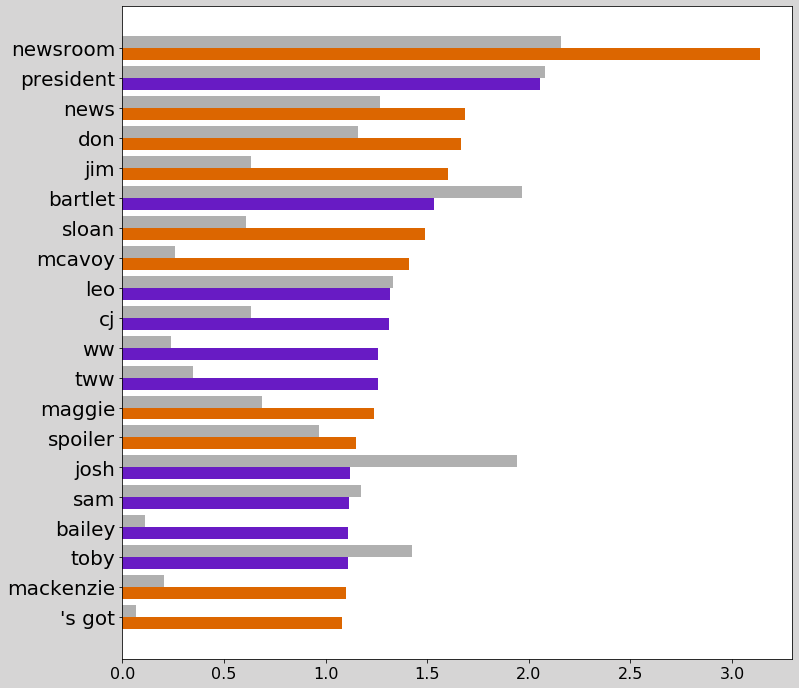

In [22]:
plt.figure(figsize=(12,12), facecolor='#D6D5D5')
color = X_df.sort_values('abs_coef').tail(20)['sign'].map({-1:'#DC6600', 1:'#681BC4'})
plt.barh(range(1, 101, 5),X_df.sort_values('abs_coef').tail(20)['abs_coef'], height=2, color=color)
plt.barh(range(3, 103, 5),X_df.sort_values('abs_coef').tail(20)['count']/150, height=2, color='#B0B0B0')
plt.xticks(fontsize=16)
plt.yticks(range(2, 102, 5), X_df.sort_values('abs_coef').tail(20).index, fontsize=20);

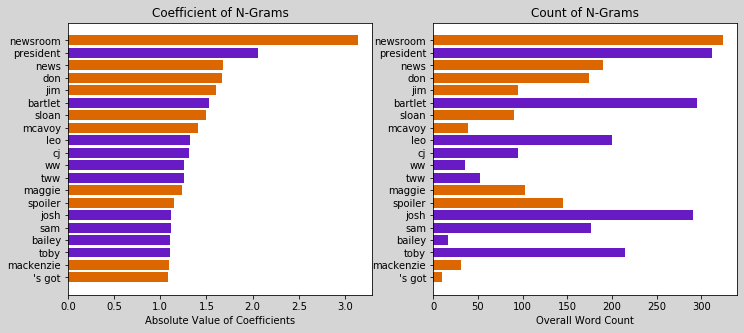

In [23]:
plt.figure(figsize=(12, 5), facecolor='#D6D5D5')
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
color = X_df.sort_values('abs_coef').tail(20)['sign'].map({-1:'#DC6600', 1:'#681BC4'})
ax2.barh(X_df.sort_values('abs_coef').tail(20).index,X_df.sort_values('abs_coef').tail(20)['count'], color=color)
ax1.barh(X_df.sort_values('abs_coef').tail(20).index,X_df.sort_values('abs_coef').tail(20)['abs_coef'], color=color)
ax1.set_title('Coefficient of N-Grams')
ax1.set_xlabel('Absolute Value of Coefficients')
ax2.set_title('Count of N-Grams')
ax2.set_xlabel('Overall Word Count')
plt.tight_layout;

### Big Text to Represent Time to Run Functions <a id="text"></a> 

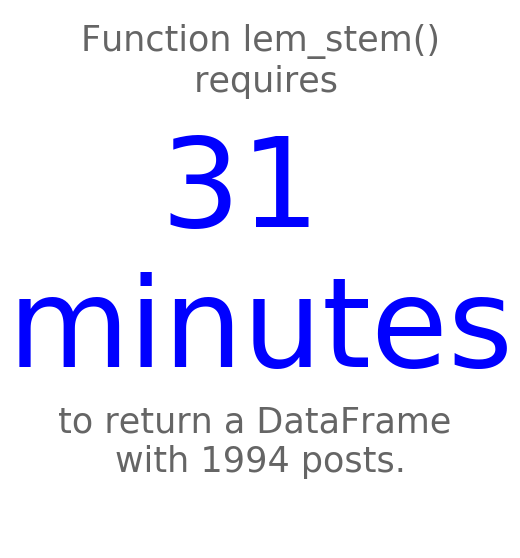

In [25]:
plt.figure(figsize=(2, 10))
plt.text(x = 0.5,                              
         y = 0.9,                              
         s = 'Function lem_stem()\n requires',
         # backslash is escape key
         ha = 'center',                        
         va = 'center',                        
         size = 35,                            
         alpha = 0.6)                          

# at (horizontal = 0.5, vertical = 0.55)
plt.text(x = 0.5,
         y = 0.53,
         s = '31 \nminutes',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1,
         color = 'blue')

# at (horizontal = 0.5, vertical = 0.25)
plt.text(x = 0.5,
         y = 0.2,
         s = 'to return a DataFrame \nwith 1994 posts.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');

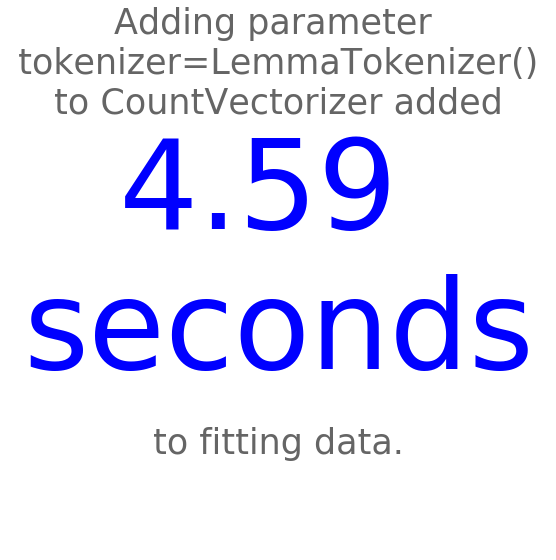

In [26]:
plt.figure(figsize=(2, 10))
plt.text(x = 0.5,                              
         y = 0.9,                              
         s = 'Adding parameter \n tokenizer=LemmaTokenizer() \nto CountVectorizer added',
         # backslash is escape key
         ha = 'center',                        
         va = 'center',                        
         size = 35,                            
         alpha = 0.6)                          

# at (horizontal = 0.5, vertical = 0.55)
plt.text(x = 0.5,
         y = 0.53,
         s = '4.59 \nseconds',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1,
         color = 'blue')

# at (horizontal = 0.5, vertical = 0.25)
plt.text(x = 0.5,
         y = 0.2,
         s = 'to fitting data.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');

### KNN N-Gram DataFrames <a id="knn"></a> 

In [31]:

X = df['stem_text']
y = df['class']

vect = CountVectorizer(max_df=0.34, max_features=50, min_df=2, ngram_range=(1,2), stop_words='english')
vect.fit(X)

X_transform = vect.transform(X)

X_transform_cv = pd.DataFrame(X_transform.toarray(),
                                 columns = vect.get_feature_names())

X_df = pd.DataFrame(X_transform_cv.sum(), index = vect.get_feature_names(), columns =['count'])
X_df.sort_values('count', ascending=False)


,count
wa,1244
thi,1143
episod,774
season,705
just,671
like,545
hi,536
watch,519
think,430
time,406


In [33]:
X = df['stem_text']
y = df['class']

tvect = TfidfVectorizer(max_df=0.25, max_features=41, min_df=2, ngram_range=(1,2), stop_words='english')
tvect.fit(X)

X_transform = tvect.transform(X)

X_transform_cv = pd.DataFrame(X_transform.toarray(),
                                 columns = tvect.get_feature_names())

X_df = pd.DataFrame(X_transform_cv.sum(), index = tvect.get_feature_names(), columns =['count'])
X_df.sort_values('count', ascending=False)

,count
episod,183.774545
season,165.019639
just,146.512955
newsroom,142.903445
watch,124.449605
like,115.780714
hi,110.881950
time,98.328350
know,97.844986
sorkin,96.897757
